# Field Mapping Code Processing Demonstration Notebook

This notebook walks through the different processing steps necessary to load Sentinel-2 data (from raw zipped .SAFE files or from a prepared sample dataset) and analyze the imagery through two workflows: Clustering and Thresholding. The core functions are stored in the fields_functions.py file, which references a file with global parameters, the global_config.py file, that stores parameters in a dictionary. Refer to that file to see what each parameter controls. Changing parameters can be done interactively in this notebook by reassigning new values to the parameter, such as: `config['prep_file_dir'] = 'path/to/directory/with/sentinel/tiles/'` 

Since there are multiple ways to load and process data, this notebook should not be run sequentially in full. The first step is loading the data. This can be done by using the `prep_data()` function to load data from a directory of zipped .SAFE Sentinel-2 L2A tiles. Since these tiles are large (about 1 GB per tile), the data is not directly available with the code. In order to enable testing of the analysis code, we have provided a sample dataset as part of thie repo. To load that, run the cell under the "Load Sample Data" heading.

### Import packages

First, check the contents of the current working directory to make sure the python files with the functions and global parameters are accessible. Then, load import the fields_functions.py file. The config parameters are stored in the global_config.py, imported at the top of the fields_functions.py along with all the packages necessary for processing. 

In [1]:
import os
from glob import glob
from pprint import pprint

cwd = os.getcwd()
print(cwd)

py_files = glob('*.py')
print(py_files)

C:\Users\jesse\Documents\grad school\masters research\code\EveryField
['fields_functions.py', 'global_config.py']


In [2]:
### Import fields functions
from fields_functions import *

Let's take a look at the config parameters. The prefix for each parameter refers to the step in the processing workflow that corresponds with the parameters. For more detail about what each parameter controls, refer to the global_config.py file

In [3]:
pprint(config)

{'kmeans_8var_clusters': True,
 'kmeans_from_full_tile_mask': False,
 'kmeans_mask_out_dir': 'mask_out_dir/',
 'kmeans_max_thresh': 0.3,
 'kmeans_min_thresh': 0,
 'kmeans_model_out_dir': 'kmeans_model_dir/',
 'kmeans_n_clusters': 15,
 'kmeans_ndwi_thresh': 0.2,
 'kmeans_range_thresh': 0.7,
 'kmeans_std_thresh': 0.2,
 'prep_apply_cloud_mask': True,
 'prep_base_chunk': 'auto',
 'prep_clip_outliers': True,
 'prep_clip_percentile': 1,
 'prep_cloud_coverage_thresh': 50,
 'prep_cloud_mask_thresh': 70,
 'prep_file_dir': 'C:/Users/jesse/Documents/grad school/masters '
                  'research/code/fields_library/data/rasters/from_MSI/',
 'prep_load_cloud_mask': True,
 'prep_manual_subset': True,
 'prep_normalize_bands': True,
 'prep_remove_overlap': False,
 'prep_step': 500,
 'prep_tile_id': 'TPT',
 'prep_time_chunk': 'auto',
 'prep_x_start': 7500,
 'prep_y_start': 7500,
 'preproc_cluster_tile': True,
 'preproc_n_clusters': 15,
 'preproc_out_dir': 'preproc_out_dir/',
 'preproc_outfile_prefi

### Changing global parameters
You can update the config dictionary interactively, too. Here, we change the base chunk size parameter. We can do this with any of the paramters within our notebook so that we do not have to change the global_config.py file directly.

In [4]:
### 
config['prep_base_chunk'] = 500
pprint(config)

{'kmeans_8var_clusters': True,
 'kmeans_from_full_tile_mask': False,
 'kmeans_mask_out_dir': 'mask_out_dir/',
 'kmeans_max_thresh': 0.3,
 'kmeans_min_thresh': 0,
 'kmeans_model_out_dir': 'kmeans_model_dir/',
 'kmeans_n_clusters': 15,
 'kmeans_ndwi_thresh': 0.2,
 'kmeans_range_thresh': 0.7,
 'kmeans_std_thresh': 0.2,
 'prep_apply_cloud_mask': True,
 'prep_base_chunk': 500,
 'prep_clip_outliers': True,
 'prep_clip_percentile': 1,
 'prep_cloud_coverage_thresh': 50,
 'prep_cloud_mask_thresh': 70,
 'prep_file_dir': 'C:/Users/jesse/Documents/grad school/masters '
                  'research/code/fields_library/data/rasters/from_MSI/',
 'prep_load_cloud_mask': True,
 'prep_manual_subset': True,
 'prep_normalize_bands': True,
 'prep_remove_overlap': False,
 'prep_step': 500,
 'prep_tile_id': 'TPT',
 'prep_time_chunk': 'auto',
 'prep_x_start': 7500,
 'prep_y_start': 7500,
 'preproc_cluster_tile': True,
 'preproc_n_clusters': 15,
 'preproc_out_dir': 'preproc_out_dir/',
 'preproc_outfile_prefix':

### Loading data

The prep_data() function expects the `'prep_data_dir'` parameter in the config dictionary to have zipped Sentinel-2 L2A tiles. L2A tiles have been preprocessed to estimate bottom of atmosphere pixel values, correcting for atmospheric aerosols. The metadata for L1C data is apparently structured differently and does not work with the GDAL function to read the tile info. 

If you do not have access to the full set of Sentinel-2 tiles, you can skip the prep_data() function call and load a sample of the data found in the google drive project folder here: https://drive.google.com/drive/folders/1n2tzO8I6EZQdkYzcB8L9omVsQDsb8eEh?usp=sharing

The sample data comes in four versions for an area in NW Minnesota from the T14TPT tile during the 2019 groing season: 500x500 pixels with and without cloud mask applied, and 1000x1000 pixel with and without cloud mask applied. 

To load the sample data, download the version of interest and fill in the sample_data_fp variable to point to where it is saved locally. Skip the next cell and run the cell to load the netCDF file directly into xarray. This should enable you to run the rest of the demo code.

In [11]:
### Loaing data from a directory of zipped Sentinel-2 files
### Skip this step if you do not have a directory with Sentinel-2 tiles in it 
### Load the sample data in the cell below instead.

ds_time_stack = prep_data()

Cloud Coverage Threshold: 50
FAILED cloud coverage: 2019 05 03 with  99.009547 pct | nodata pixel pct: 0.126635
FAILED cloud coverage: 2019 05 06 with  72.591515 pct | nodata pixel pct: 5.957223
passed cloud coverage: 2019 05 13 with 34.97001 pct | nodata pixel pct: 0.134791
FAILED cloud coverage: 2019 05 16 with  72.077132 pct | nodata pixel pct: 5.796779
FAILED cloud coverage: 2019 05 23 with  96.121381 pct | nodata pixel pct: 0.149615
FAILED cloud coverage: 2019 05 26 with  73.563154 pct | nodata pixel pct: 5.719112
passed cloud coverage: 2019 06 02 with 21.420233 pct | nodata pixel pct: 0.193563
passed cloud coverage: 2019 06 05 with 3.328879 pct | nodata pixel pct: 5.51809
passed cloud coverage: 2019 06 12 with 3.1731840000000004 pct | nodata pixel pct: 0.164777
FAILED cloud coverage: 2019 06 15 with  91.997779 pct | nodata pixel pct: 5.732784
FAILED cloud coverage: 2019 06 22 with  95.609655 pct | nodata pixel pct: 0.121118
passed cloud coverage: 2019 06 25 with 31.59953999999999

### Loading sample data
Here, we will load the prepared sample data for a 500x500 pixel area in northwest Minnesota by reading the netCDF file directly into an xarray dataset. This is the same as the prep_data() output but for a smaller spatial area. When we read in the data with `xr.open_dataset()` be sure to include the `chunks` argument to coerce the data into dask arrays, which enable parallel processing during the analysis steps. Here, we use the `'auto'` argument to allow xarray to automatically assign an appropriate chunk size to each of the three dimensions: x, y, and time.

In [5]:
### Loading sample data directly from netCDF file

# filepath to the sample data
# sample_data_fp = 'C:/Users/jesse/Documents/grad school/masters research/code/fields_library/thesis_code_cleanup/sample_data/sample_data_TPT_px500_cldcov40_cldmask.nc'
sample_data_fp = 'sample_data/sample_data_TPT_px500_cldcov40_cldmask.nc'


### In order to utilize parallel processing with dask within xarray, make sure to set a chunk size when reading in the data.
### You can use the keywork 'auto' to have dask automatically set a chunk size based on data size and memory limitations
ds_time_stack = xr.open_dataset(sample_data_fp, chunks={'x':'auto', 'y':'auto','time':'auto'})
print(ds_time_stack)

<xarray.Dataset>
Dimensions:  (time: 30, x: 500, y: 500)
Coordinates:
  * x        (x) float64 6.75e+05 6.75e+05 6.75e+05 ... 6.8e+05 6.8e+05 6.8e+05
  * y        (y) float64 5.208e+06 5.208e+06 5.208e+06 ... 5.203e+06 5.203e+06
  * time     (time) datetime64[ns] 2019-05-13 2019-05-31 ... 2019-10-28
Data variables:
    red      (time, y, x) float64 dask.array<chunksize=(30, 500, 500), meta=np.ndarray>
    green    (time, y, x) float64 dask.array<chunksize=(30, 500, 500), meta=np.ndarray>
    blue     (time, y, x) float64 dask.array<chunksize=(30, 500, 500), meta=np.ndarray>
    nir      (time, y, x) float64 dask.array<chunksize=(30, 500, 500), meta=np.ndarray>
Attributes:
    transform:     [ 1.00000e+01  0.00000e+00  6.00000e+05  0.00000e+00 -1.00...
    crs:           +init=epsg:32614
    res:           [10. 10.]
    is_tiled:      1
    nodatavals:    [nan nan nan nan]
    scales:        [1. 1. 1. 1.]
    offsets:       [0. 0. 0. 0.]
    descriptions:  ['B4, central wavelength 665 n

### Visualize a band from the imagery

Let's take a look at the NIR band from one of the time steps in our raster stack. We named this object `ds_time_stack` because it is an xarray Dataset (ds) structure comprised of a stack of 4-band raster imagery across the time period of our study (May - October, 2019). We can use some built-in xarray methods to select the time based on an index value in the time dimension `.isel(time=8)` and select the NIR band via the data variable name `.nir` and then use the `.plot()` method to visualize the band via a matplotlib wrapper function.

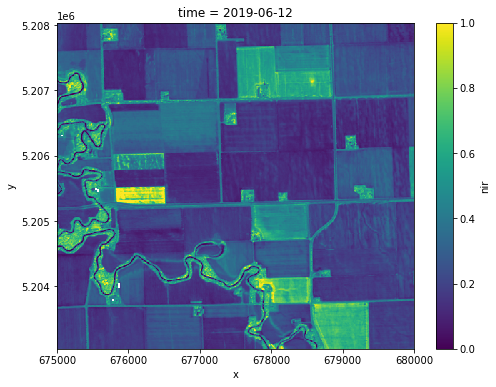

In [6]:
ds_time_stack.isel(time=6).nir.plot(figsize=(8,6))

## Cluster Analysis Workflow

Now that we have the data loaded into our data structure via the `ds_time_stack` object, we can conduct some preprocessing to extract useful data from our raw imagery. In the preprocessing step, we compute the monthly median NDVI values, the mean NDWI values, and the standard deviation of NDVI over time for each pixel. These data get saved to a separate netCDF file. The variables produced in this preprocessing step can be customized in the `preprocess_to_netcdf()` function in the fields_functions.py file. These preprocessed data layers then get passed to a K-Means clustering algorithm to identify clusters of similar pixels based on the preprocessed temporal data inputs. The cluster centers for each chunk processed get saved out to separate files, then later we cluster all the sampled data and classify the clusters into crop or non-crop classes to create a crop mask.

In [7]:
%%time

### preprocessing main function to combine data read and preprocessing.
### not used here, but it is useful for batch processing multiple tiles
def preprocess_main():
    global config
    ### START TIMING
    t_start = time.perf_counter()
    t_proc_start = time.process_time()
    
    ### Prep data stack
    ds_time_stack = prep_data()
    ds_time_stack = ds_time_stack.sel(time=slice('2019-05-01', '2019-11-01'))
    
    ### Preprocess data and save to netCDF file
    preprocess_to_netcdf(ds_time_stack)
    
    ### STOP TIMING
    t_stop = time.perf_counter()
    t_proc_stop = time.process_time()
    tot_cpu_time = t_proc_stop - t_proc_start
    tot_wall_time = t_stop - t_start
    ### timing
    print("Total CPU time:", tot_cpu_time)
    print("Total Wall time:", tot_wall_time)
    
#     ### Write out processing log to record processing time and input parameters in the same folder as the shp output
#     preprocessing_log(tot_cpu_time, tot_wall_time)
    
preprocess_to_netcdf(ds_time_stack)

C:\Users\jesse\Anaconda3\envs\geoenv\lib\site-packages\numpy\lib\nanfunctions.py:1115: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


Monthly Median Total CPU time: 2.21875
Monthly Median Total Wall time: 2.256803599999998
saving preprocessed tile to: preproc_out_dir/fields_preproc_demo_TPT.nc


C:\Users\jesse\Anaconda3\envs\geoenv\lib\site-packages\dask\core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
C:\Users\jesse\Anaconda3\envs\geoenv\lib\site-packages\dask\array\numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


Writing NetCDF file Total CPU time: 2.890625
Writing NetCDF file Total Wall time: 2.7451058999999987
ndvi_mon_med_stack <xarray.DataArray (stack: 250000, variable: 6)>
dask.array<where, shape=(250000, 6), dtype=float64, chunksize=(250000, 6), chunktype=numpy.ndarray>
Coordinates:
  * variable  (variable) datetime64[ns] 2019-05-01 2019-06-01 ... 2019-10-01
  * stack     (stack) MultiIndex
  - x         (stack) float64 6.75e+05 6.75e+05 6.75e+05 ... 6.8e+05 6.8e+05
  - y         (stack) float64 5.208e+06 5.208e+06 ... 5.203e+06 5.203e+06
image array to cluster: <xarray.DataArray (stack: 250000, variable: 8)>
dask.array<rechunk-merge, shape=(250000, 8), dtype=float64, chunksize=(250000, 8), chunktype=numpy.ndarray>
Coordinates:
  * stack     (stack) MultiIndex
  - x         (stack) float64 6.75e+05 6.75e+05 6.75e+05 ... 6.8e+05 6.8e+05
  - y         (stack) float64 5.208e+06 5.208e+06 ... 5.203e+06 5.203e+06
  * variable  (variable) object 2019-05-01 2019-06-01 ... 'ndvi_std' 'ndwi_mean'


C:\Users\jesse\Anaconda3\envs\geoenv\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\jesse\Anaconda3\envs\geoenv\lib\site-packages\dask\core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
C:\Users\jesse\Anaconda3\envs\geoenv\lib\site-packages\dask\array\numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
C:\Users\jesse\Anaconda3\envs\geoenv\lib\site-packages\dask\core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
C:\Users\jesse\Anaconda3\envs\geoenv\lib\site-packages\dask\array\numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


kmeans clustering done in 4.760s.
Writing Cluster Centers NetCDF file Total CPU time: 0.015625
Writing Cluster Centers NetCDF file Total Wall time: 0.018944099999998798
Wall time: 10.4 s


### Statewide Clustering

This cell is for combining the preprocessed data and k-means cluster centers from the sampled chunks into a 'statewide' mask. Based on the parameters set for the kmeans clustering in the global config dictionary, we assign each cluster a 'crop' or 'non-crop' label and then save this binary layer out as a mask. For the sample data, we do not have enough area in the data to get a robust statewide sample of the temporal characteristics of all the different land cover types, but this approach will still work for our small area.

In [8]:
%%time

### This results in an unexpected NameError on the tile_id name but the outputs are as expected and I couldn't find the bug

write_statewide_kmeans_model()

t_start = time.time()
create_mask_from_kmeans()
print(tile_id, "mask processing done in %0.3fs." % (time.time() - t_start))

<xarray.Dataset>
Dimensions:       (cluster_vars: 8, n: 15)
Coordinates:
  * cluster_vars  (cluster_vars) object 'ndvi_may' 'ndvi_jun' ... 'ndwi_mean'
Dimensions without coordinates: n
Data variables:
    clusters      (n, cluster_vars) float64 dask.array<chunksize=(15, 8), meta=np.ndarray>
KMeans training on statewide samples done in 0.079s.
Cluster Centers: <xarray.DataArray (cluster_ID: 15, cluster_vars: 8)>
array([[ 8.39366659e-02,  6.26798948e-01,  5.88953619e-01,
         3.76429554e-01,  4.45687429e-01,  5.16117693e-01,
         4.40461435e-01,  2.63119235e-01],
       [-4.60079108e-01, -3.88640314e-01,  7.91780530e-01,
         8.12927704e-01,  6.42161552e-01, -2.62540307e-01,
         7.77929728e-01,  1.51829517e-01],
       [-2.22519754e-01, -2.26789308e-02,  4.68592007e-02,
         4.10142771e-02,  9.99302229e-02, -4.76475136e-02,
         2.51531448e-01,  3.74323043e-01],
       [-4.25179687e-01,  3.71334627e-01,  6.09998479e-01,
        -1.37757093e-01, -3.40044999e-01, -

NameError: name 'tile_id' is not defined

### Load and visualize the cluster-based crop mask
Now we can load the mask and visualize it.

there are 1 patches for tile: TPT
<xarray.Dataset>
Dimensions:  (x: 500, y: 500)
Coordinates:
  * x        (x) float64 6.75e+05 6.75e+05 6.75e+05 ... 6.8e+05 6.8e+05 6.8e+05
  * y        (y) float64 5.208e+06 5.208e+06 5.208e+06 ... 5.203e+06 5.203e+06
Data variables:
    mask     (y, x) bool dask.array<chunksize=(500, 500), meta=np.ndarray>
Wall time: 84.8 ms


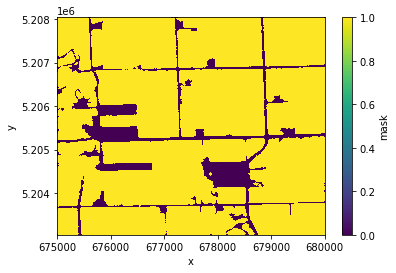

In [9]:
%%time

### Load mask to take a look at it

mask_array = load_mask()
mask_array.mask.plot()

### Segment the masked imagery into field polygons
Finally, we can apply our binary crop mask to a set of imagery and pass that to a segmentation algorithm that will create field polygons objects and save them out as a shapefile.

In [19]:
%%time

### Demo function for combining 
def segmentation_from_clusters_main():
    mask_array = load_mask()
    
    ds_time_stack = prep_data()
    
    t0 = time.time()
    ### Segment the image
    segmented_array, rgb_image_nir = segment_data(ds_time_stack, mask_array)
    print("Segmentation done in %0.3fs." % (time.time() - t0))
    
    t0 = time.time()
    ### Write segments to shapefile
    write_shapefile(segmented_array, ds_time_stack, mask_array.mask)
    print("Shapefile write done in %0.3fs." % (time.time() - t0))
    
# t0 = time.time()    
# segmentation_from_clusters_main()
# print("Processing done in %0.3fs." % (time.time() - t0))
    
    
t0 = time.time()
### Segment the image
segmented_array, rgb_image_nir = segment_data(ds_time_stack, mask_array)
print("Segmentation done in %0.3fs." % (time.time() - t0))

t0 = time.time()
### Write segments to shapefile
write_shapefile(segmented_array, ds_time_stack, mask_array.mask)
print("Shapefile write done in %0.3fs." % (time.time() - t0))

-------Segmentation-------
date list: [datetime.datetime(2019, 6, 12, 0, 0), datetime.datetime(2019, 7, 2, 0, 0), datetime.datetime(2019, 7, 12, 0, 0), datetime.datetime(2019, 7, 22, 0, 0), datetime.datetime(2019, 7, 7, 0, 0), datetime.datetime(2019, 8, 6, 0, 0)]
cloud coverage: [3.1731840000000004, 0.438801, 3.086262, 1.7739530000000001, 0.247529, 0.038382]
no data pct: [0.164777, 0.100594, 0.086267, 0.070939, 0.065132, 0.06491]
[numpy.datetime64('2019-07-12T00:00:00.000000000'), numpy.datetime64('2019-08-06T00:00:00.000000000'), numpy.datetime64('2019-07-22T00:00:00.000000000')]
Segmentation done in 3.437s.
-------Writing to Shapefile-------
Output saved to: shp_dir/TPT_code_demo_clustering_x7500_y7500_step500.shp
Shapefile write done in 0.246s.
Wall time: 3.68 s


### Thresholding Approach
The Thresholding approach is a different way to create the crop mask. It passes a set of threshold values to several layers that are useful for differentiating crop pixels from non-crop pixels: NDVI max, NDVI range, NDWI, and Edge magnitude. 

First, we have to load the parameters into variables from the global config because the config dictionary is not directly incorporated into the thresholding functions.

In [10]:
%%time
## Example code for running Thresholding approach
## These functions are not integrated into the global config, so variables have to be defined before the function call

### Set file paths for read and write
file_out_str = '_code_demo_threshold'
out_dir = config['shp_out_dir']
tile_id = config['prep_tile_id']
raster_dir = config['prep_file_dir']
x_start = config['prep_x_start']
y_start = config['prep_y_start']
step = config['prep_step']
base_chunk = 'auto'

## Data read parameters
cloud_thresh = 20

## Crop maask parameters
ndwi_thresh = 0.5 
ndvi_max_thresh = 0.5
ndvi_range_thresh = 0.5 
edges_thresh = 0.3

# set rgb date string from the dict
rgb_date_str = rgb_date_dict[tile_id]
rgb_gaussian_sigma = config['seg_rgb_gaussian_sigma']
fz_scale = config['seg_fz_scale']
fz_sigma = config['seg_fz_sigma']
fz_min_size = config['seg_fz_min_size']

Wall time: 0 ns


### Loading data for thresholding approach

For this approach, we will use a slightly different set of data. We will load the same spatial subset area from the sample data but this data was prepared without using a cloud mask. To avoid contamination from cloud coverage, we use a more restrictuve cloud threshold value so that only snapshots with less than 20% cloud coverage are read into our dataset. 

We will give this data the same `ds_time_stack` object name. You will notice that it has 18 images in the time dimension instead of 30 images in the version of the sample data that uses the cloud mask.

In [24]:
### Loading sample data directly from netCDF file

# filepath to the sample data
# sample_data_fp = 'C:/Users/jesse/Documents/grad school/masters research/code/fields_library/thesis_code_cleanup/sample_data/sample_data_TPT_px500_cldcov40_cldmask.nc'
sample_data_fp = 'sample_data/sample_data_TPT_px500_cldcov20_Nocldmask.nc'


### In order to utilize parallel processing with dask within xarray, make sure to set a chunk size when reading in the data.
### You can use the keywork 'auto' to have dask automatically set a chunk size based on data size and memory limitations
ds_time_stack = xr.open_dataset(sample_data_fp, chunks={'x':'auto', 'y':'auto','time':'auto'})
print(ds_time_stack)

<xarray.Dataset>
Dimensions:  (time: 18, x: 500, y: 500)
Coordinates:
  * x        (x) float64 6.75e+05 6.75e+05 6.75e+05 ... 6.8e+05 6.8e+05 6.8e+05
  * y        (y) float64 5.208e+06 5.208e+06 5.208e+06 ... 5.203e+06 5.203e+06
  * time     (time) datetime64[ns] 2019-05-31 2019-06-05 ... 2019-10-28
Data variables:
    red      (time, y, x) float64 dask.array<chunksize=(18, 500, 500), meta=np.ndarray>
    green    (time, y, x) float64 dask.array<chunksize=(18, 500, 500), meta=np.ndarray>
    blue     (time, y, x) float64 dask.array<chunksize=(18, 500, 500), meta=np.ndarray>
    nir      (time, y, x) float64 dask.array<chunksize=(18, 500, 500), meta=np.ndarray>
Attributes:
    transform:     [ 1.00000e+01  0.00000e+00  6.00000e+05  0.00000e+00 -1.00...
    crs:           +init=epsg:32614
    res:           [10. 10.]
    is_tiled:      1
    nodatavals:    [nan nan nan nan]
    scales:        [1. 1. 1. 1.]
    offsets:       [0. 0. 0. 0.]
    descriptions:  ['B4, central wavelength 665 n

Wall time: 265 ms


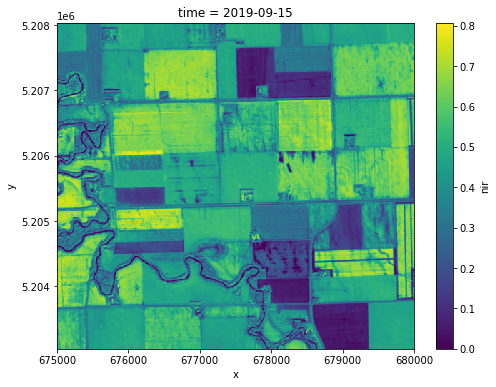

In [25]:
%%time
ds_time_stack.isel(time=12).nir.plot(figsize=(8,6))

### Breaking down the thresholding approach by step

In the cells below, each step of the thresholding approach is broken out. First we create a crop mask by passing a series of threshold values to the NDVI mean monthly max, NDVI mean monthly change from May to peak, mean edge magnitude, and NDWI. Then, we prepare a cloud free RGB image to use for segmentation and apply the mask to it. Then we pass the masked RGB image to the segmentation step to create the field polygons. Finally, we write the field polygons to a shapefile.

For each step, the output is added to the ds_time_stack data structure as a new data variable. This keeps all the data organized and with consistent spatial metadata throughout the process. Printing the ds_time_stack dataset after each step reveals the intermediate outputs: mask, rgb, fz_segments (segmented field polygons).

#### First: Mask processing
The first step is to create the crop mask using a series of thresholds on a set of derived imagery layers: Monthly Mean NDVI, NDWI, and Edges.

The first step is to compute the average NDWI for the full growing season and apply a threshold value

Wall time: 1.62 s


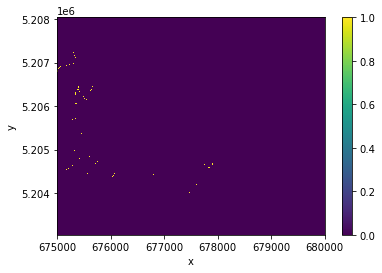

In [26]:
%%time

### NDWI mask: mean NDWI across all time steps, masked for values greater than ndwi_thresh
ndwi_mask = ndwi_mask_func(ds_time_stack, ndwi_thresh = ndwi_thresh)

ndwi_mask.plot()

Then we look at NDVI, computing a monthly mean NDVI value then thresholding the maximum values and the range between the first month NDVI and the maximum NDVI, to identify pixels that show a large growth in vegetation over the growing season.

Wall time: 1.63 s


C:\Users\jesse\Anaconda3\envs\geoenv\lib\site-packages\dask\utils.py:31: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)


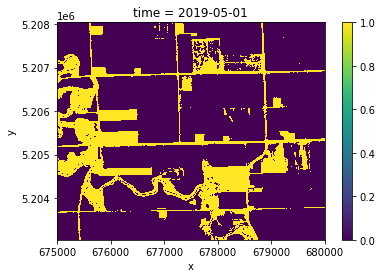

In [27]:
%%time

### NDVI Masking
# Compute mean NDVI on the monthly composite images as input to the NDVI masking function
# Compute NDVI mask: Max monthly mean NDVI > max_thresh, and Max Monthly NDVI - May monthly mean NDVI 
combined_ndvi_mask = mask_ndvi_max_and_range(ndvi_xr_norm(ds_time_stack.resample(time='1MS').mean(skipna = True)), 
                                             max_thresh = ndvi_max_thresh, 
                                             range_thresh = ndvi_range_thresh)

combined_ndvi_mask.plot()

Then we look at the persisten edges in the imagery to mask out the boundaries between neighboring fields that might have similar vegetative characteristics in the other components of the mask. We pass the sobel edge algorithm over each band in each time step and take the average edge magnitude for the full season. Then we pass a threshold value to that layer to create a mask.

Wall time: 0 ns
edges time step: 0
edges time step: 1
edges time step: 2
edges time step: 3
edges time step: 4
edges time step: 5
edges time step: 6
edges time step: 7
edges time step: 8
edges time step: 9
edges time step: 10
edges time step: 11
edges time step: 12
edges time step: 13
edges time step: 14
edges time step: 15
edges time step: 16
edges time step: 17


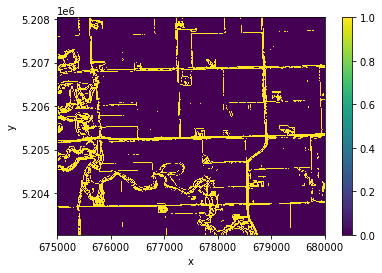

In [28]:
%time

### Edges
# Mean edges for full data stack
edges_mean = compute_edges(ds_time_stack)
# Mask edges
edges_mask = xr.where(edges_mean > edges_thresh, 1, 0)

edges_mask.plot()

In [29]:
### Combined mask is a combination of the component masks via a logical OR function
### If a pixel is masked out in any of the component masks it is masked out in the combined mask layer
combined_mask = xr.ufuncs.logical_or(xr.ufuncs.logical_or(ndwi_mask, combined_ndvi_mask), edges_mask)
# Invert mask
combined_mask = xr.where(combined_mask == 1, 0, 1)

### Fill holes in the mask so that there aren't stray pixels
combined_mask = combined_mask.data.map_overlap(fill_holes, depth=1)

### Set minimum filter to enforce minimum height/width of background. 
### This eliminates small isolated areas and expands road areas.
### This can be replaced with some of the morphological filters used in the cluster mask clean up process
combined_mask = combined_mask.map_overlap(min_filter, depth = 1)

### Set mask to ds_time_stack array
ds_time_stack['mask'] = xr.DataArray(combined_mask, 
                                 dims=('y','x'),
                                 coords = [ds_time_stack['red'].coords['y'],
                                           ds_time_stack['red'].coords['x']])

print(ds_time_stack)

<xarray.Dataset>
Dimensions:  (time: 18, x: 500, y: 500)
Coordinates:
  * x        (x) float64 6.75e+05 6.75e+05 6.75e+05 ... 6.8e+05 6.8e+05 6.8e+05
  * y        (y) float64 5.208e+06 5.208e+06 5.208e+06 ... 5.203e+06 5.203e+06
  * time     (time) datetime64[ns] 2019-05-31 2019-06-05 ... 2019-10-28
Data variables:
    red      (time, y, x) float64 dask.array<chunksize=(18, 500, 500), meta=np.ndarray>
    green    (time, y, x) float64 dask.array<chunksize=(18, 500, 500), meta=np.ndarray>
    blue     (time, y, x) float64 dask.array<chunksize=(18, 500, 500), meta=np.ndarray>
    nir      (time, y, x) float64 dask.array<chunksize=(18, 500, 500), meta=np.ndarray>
    mask     (y, x) bool dask.array<chunksize=(500, 500), meta=np.ndarray>
Attributes:
    transform:     [ 1.00000e+01  0.00000e+00  6.00000e+05  0.00000e+00 -1.00...
    crs:           +init=epsg:32614
    res:           [10. 10.]
    is_tiled:      1
    nodatavals:    [nan nan nan nan]
    scales:        [1. 1. 1. 1.]
    off

C:\Users\jesse\Anaconda3\envs\geoenv\lib\site-packages\dask\utils.py:31: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)


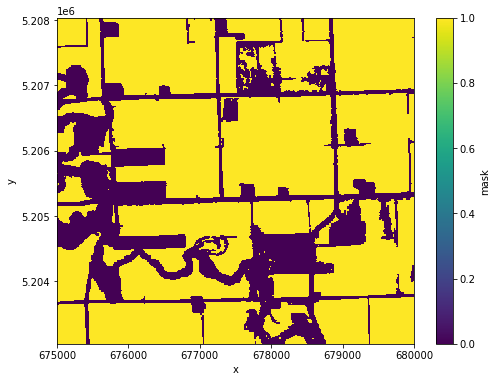

In [30]:
ds_time_stack.mask.plot(figsize=(8,6))

We can also combine the entire masking process into a single function, as it is below. Since we already have the mask as part of the `ds_time_stack` object as a data variable, essentially as a new imagery band, we can skip the cell below

In [ ]:
%%time

# ### Create crop mask in a single function
# ds_time_stack = mask_processing(ds_time_stack, 
#                                 ndwi_thresh = ndwi_thresh, 
#                                 ndvi_max_thresh = ndvi_max_thresh, 
#                                 ndvi_range_thresh = ndvi_range_thresh, 
#                                 edges_thresh = edges_thresh)

# print(ds_time_stack)

# ### plot crop mask
# ds_time_stack.mask.plot(figsize=(8,6))

### Preparing an image for segmentation

Now that we have the crop mask, we need to apply it to an image that we can pass to the segmentation algorithm that will produce field polygons. The segmentaiton algorithm expects a three-channel RGB image and will segment it based on similarity of color and spatial proximity. To prep an image, we select a time step without clouds during peak growing season (this was a manual process, but can be automated) and apply the crop mask. This masked RGB raster gets added to the `ds_time_stack` as another data variable.

In [32]:
%%time

ds_time_stack['rgb'] = rgb_image(rgb_date_str = rgb_date_str, 
                                          ds_time_stack = ds_time_stack, 
                                          rgb_chunk_size = {'band': "auto", 'x': base_chunk, 'y': base_chunk}, 
                                          gaussian_filt = True, 
                                          gaussian_sigma = rgb_gaussian_sigma, 
                                          percentile = 1)
print(ds_time_stack)

<xarray.Dataset>
Dimensions:  (band: 3, time: 18, x: 500, y: 500)
Coordinates:
  * x        (x) float64 6.75e+05 6.75e+05 6.75e+05 ... 6.8e+05 6.8e+05 6.8e+05
  * y        (y) float64 5.208e+06 5.208e+06 5.208e+06 ... 5.203e+06 5.203e+06
  * time     (time) datetime64[ns] 2019-05-31 2019-06-05 ... 2019-10-28
  * band     (band) <U1 'r' 'g' 'b'
Data variables:
    red      (time, y, x) float64 dask.array<chunksize=(18, 500, 500), meta=np.ndarray>
    green    (time, y, x) float64 dask.array<chunksize=(18, 500, 500), meta=np.ndarray>
    blue     (time, y, x) float64 dask.array<chunksize=(18, 500, 500), meta=np.ndarray>
    nir      (time, y, x) float64 dask.array<chunksize=(18, 500, 500), meta=np.ndarray>
    mask     (y, x) bool dask.array<chunksize=(500, 500), meta=np.ndarray>
    rgb      (y, x, band) float64 dask.array<chunksize=(500, 500, 3), meta=np.ndarray>
Attributes:
    transform:     [ 1.00000e+01  0.00000e+00  6.00000e+05  0.00000e+00 -1.00...
    crs:           +init=epsg:3

C:\Users\jesse\Anaconda3\envs\geoenv\lib\site-packages\dask\utils.py:31: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)


Wall time: 2.78 s


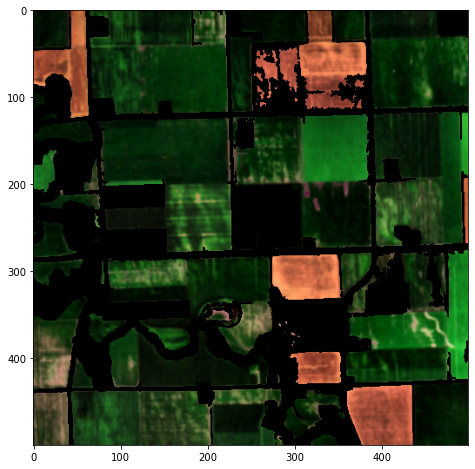

In [34]:
%%time

### plot masked RGB image
fig, ax = plt.subplots(figsize=(8,8))
plt.imshow(exposure.equalize_adapthist(ds_time_stack.rgb))

### Segmenting the imagery into field polygons

Next, we use the masked RGB image as input to the segmentation algorithm. Since the data is stored as a dask array within the xarray dataset, we can utilize the `dask.map_blocks()` function to map the segmentation algorithm (in this case, the felzenszwalb algorithm from the skimage library) across the chunks of the RGB image with an overlap to account for the seams between chunks. By calling the rgb data variable with `.data` we can access the array as a dask array, which allows us to use parallel processing functions from dask within an xarray data structure.

In [35]:
%%time 
### Segment the RGB image
fz_segments = ds_time_stack.rgb.data.map_blocks(segment_fz, scale = fz_scale, sigma = fz_sigma, min_size = fz_min_size, drop_axis = 2)
ds_time_stack['fz_segments'] = xr.DataArray(fz_segments.astype('int32'), 
                                            dims=('y','x'),
                                            coords = [ds_time_stack['red'].coords['y'],ds_time_stack['red'].coords['x']])
print(ds_time_stack)

<xarray.Dataset>
Dimensions:      (band: 3, time: 18, x: 500, y: 500)
Coordinates:
  * x            (x) float64 6.75e+05 6.75e+05 6.75e+05 ... 6.8e+05 6.8e+05
  * y            (y) float64 5.208e+06 5.208e+06 ... 5.203e+06 5.203e+06
  * time         (time) datetime64[ns] 2019-05-31 2019-06-05 ... 2019-10-28
  * band         (band) <U1 'r' 'g' 'b'
Data variables:
    red          (time, y, x) float64 dask.array<chunksize=(18, 500, 500), meta=np.ndarray>
    green        (time, y, x) float64 dask.array<chunksize=(18, 500, 500), meta=np.ndarray>
    blue         (time, y, x) float64 dask.array<chunksize=(18, 500, 500), meta=np.ndarray>
    nir          (time, y, x) float64 dask.array<chunksize=(18, 500, 500), meta=np.ndarray>
    mask         (y, x) bool dask.array<chunksize=(500, 500), meta=np.ndarray>
    rgb          (y, x, band) float64 dask.array<chunksize=(500, 500, 3), meta=np.ndarray>
    fz_segments  (y, x) int32 dask.array<chunksize=(500, 500), meta=np.ndarray>
Attributes:
    tr

C:\Users\jesse\Anaconda3\envs\geoenv\lib\site-packages\dask\utils.py:31: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)


Wall time: 3.33 s


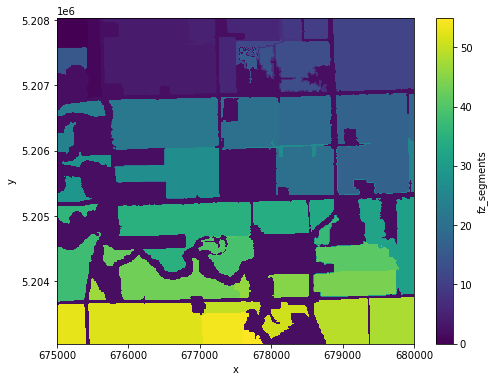

In [36]:
%%time

### Plot field segments
ds_time_stack.fz_segments.plot(figsize=(8,6))

### Saving to shapefile

Finally, we can export the segmented field objects to a shapefile by utilizing the spatial metadata in the `ds_time_stack` from when we loaded the initial raster imagery. This makes the xarray data structure particularly useful for handling spatial data.

In [22]:
%%time

## write to shapefile
config['shp_file_out_str'] = file_out_str

write_shapefile(ds_time_stack.fz_segments.values, ds_time_stack, ds_time_stack.mask)


C:\Users\jesse\Anaconda3\envs\geoenv\lib\site-packages\dask\utils.py:31: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)


-------Writing to Shapefile-------


C:\Users\jesse\Anaconda3\envs\geoenv\lib\site-packages\dask\utils.py:31: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)


Output saved to: shp_dir/TPT_code_demo_threshold_x7500_y7500_step500.shp
Wall time: 11.4 s
